# Exploratory Data Analysis on PowerCo Customer Data
---

# Information about Datasets


The dataset `ml_case_training_output.csv` named as `pco_output` contains:
> * `id`: contact id
*`churn`: has the client churned over the next 3 months


The dataset `ml_case_training_hist_data.csv` named as `pco_hist` contains the history of energy and power consumption per client:
>* `id`: contact id
*`price_date`: reference date
*`price_p1_var`: price of energy for the 1st period
*`price_p2_var`: price of energy for the 2nd period
*`price_p3_var`: price of energy for the 3rd period
*`price_p1_fix`: price of power for the 1st period
*`price_p2_fix`: price of power for the 2nd period
*`price_p3_fix`: price of power for the 3rd period


The dataset `ml_case_training_data.csv` contains:
>* `id`: contact id
* `activity_new`: category of the company's activity. 419 unique values, remove `NaN`
* `campaign_disc_elec`: code of the electricity campaign the customer last subscribed to. 0 non-null
* `channel_sales`: code of the sales channel
* `cons_12m`: electricity consumption of the past 12 months
* `cons_gas_12m`: gas consumption of the past 12 months
* `cons_last_month`: electricity consupmtion of the last month
* `date_activ`: date of activation of the contract
* `date_end`: registered date of the end of the contract
* `date_first_activ`: date of first contract of the client
* `date_modif_prod`: date of last modification of the product
*  `date_renewal`: date of the next contract renewal
* `forecast_base_bill_ele`: forecasted electricity bill baseline for next month
* `forecast_base_bill_year`: forecasted electricity bill baseline for calendar year
* `forecast_bill_12m`: forecasted electricity bill baseline for 12 months
* `forecast_cons`: forecasted electricity consumption for next month
* `forecast_cons_12m`: forecasted electricity consumption for next 12 months
* `forecast_cons_year`: forecasted electricity consumption for next calendar year
* `forecast_discount_energy`: forecasted value of current discount
* `forecast_meter_rent_12m`: forecasted bill of meter rental for the next 12 months
* `forecast_price_energy_p1`: forecasted energy price for 1st period
* `forecast_price_energy_p2`: forecasted energy price for 2nd period
* `forecast_price_pow_p1`: forecasted power price for 1st period
* `has_gas`: indicated if client is also a gas client
* `imp_cons`: current paid consumption
* `margin_gross_pow_ele`: gross margin on power subscription
* `margin_net_pow_ele`: net margin on power subscription
* `nb_prod_act`: number of active products and services
* `net_margin`: total net margin
* `num_years_antig`: antiquity of the client (in number of years)
* `origin_up`: code of the electricity campaign the customer first subscribed to
* `pow_max`: subscribed power

---

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
from scipy.stats import zscore as zscore

%matplotlib inline
sns.set(color_codes=True)

In [10]:
# Importing datasets into dataframes
pco_energyDataset = pd.read_csv('./ml_case_training_data.csv')
pco_history = pd.read_csv('./ml_case_training_hist_data.csv')
pco_output = pd.read_csv('./ml_case_training_output.csv')

# displaying the shape of each dataframes
print(pco_energyDataset.shape)
print(pco_history.shape)
print(pco_output.shape)

(16096, 32)
(193002, 8)
(16096, 2)


# Analysis on Datasets
---

### Energy consumption and forcasting data analysis

In [11]:
# displaying the data
pco_energyDataset.head(6)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,NaN,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,...,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000


In [12]:
# displaying the informaion
pco_energyDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [13]:
pco_energyDataset.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [14]:
# displaying thr missing data stats
print("** Displaying the missing value stats **")
for col in pco_energyDataset.columns:
    print(col , ": ", pco_energyDataset[col].isnull().sum())

** Displaying the missing value stats **
id :  0
activity_new :  9545
campaign_disc_ele :  16096
channel_sales :  4218
cons_12m :  0
cons_gas_12m :  0
cons_last_month :  0
date_activ :  0
date_end :  2
date_first_activ :  12588
date_modif_prod :  157
date_renewal :  40
forecast_base_bill_ele :  12588
forecast_base_bill_year :  12588
forecast_bill_12m :  12588
forecast_cons :  12588
forecast_cons_12m :  0
forecast_cons_year :  0
forecast_discount_energy :  126
forecast_meter_rent_12m :  0
forecast_price_energy_p1 :  126
forecast_price_energy_p2 :  126
forecast_price_pow_p1 :  126
has_gas :  0
imp_cons :  0
margin_gross_pow_ele :  13
margin_net_pow_ele :  13
nb_prod_act :  0
net_margin :  15
num_years_antig :  0
origin_up :  87
pow_max :  3


<AxesSubplot:>

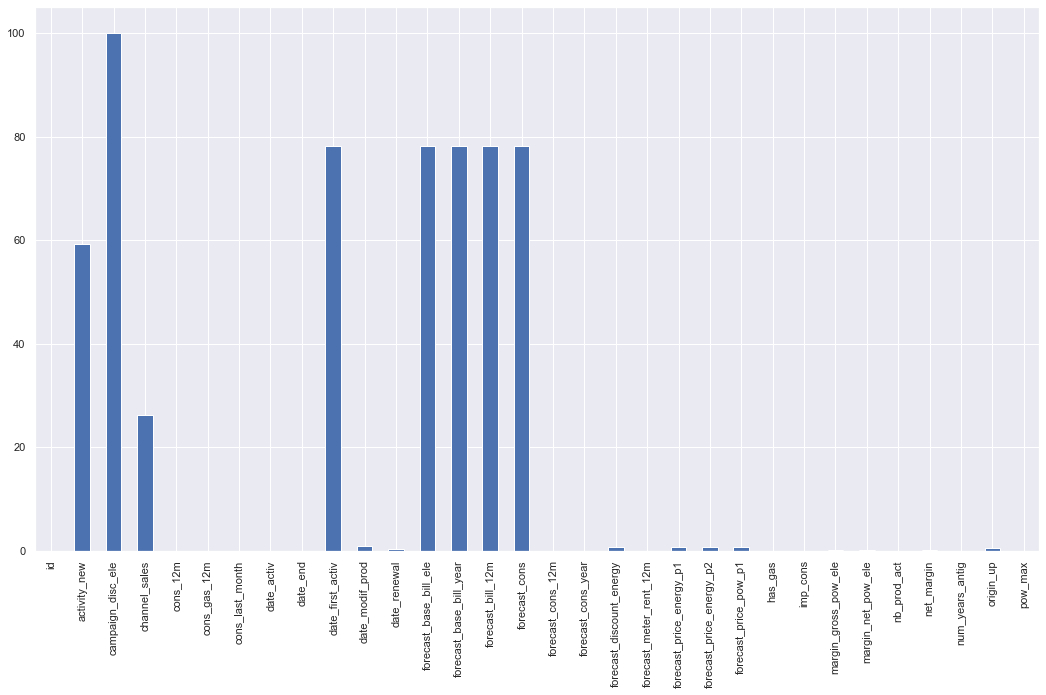

In [15]:
(pco_energyDataset.isnull().sum()/len(pco_energyDataset.index)*100).plot(kind="bar", figsize=(18,10))

#### Important Observation
* `forcast` features have outliers <br>
* Average tenure of the client is 5 years<br>
* Average subscribed power is 20<br>
* The average net-margin is $217<br>

### The History dataset
Note: This dataset has customer insights of year 2015

In [16]:
pco_history.head(10)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0


In [17]:
pco_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [18]:
pco_history.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [19]:
# Missing value percentages
pco_history.isnull().sum()*100/pco_history.shape[0]

id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64

### Observations

* Average price of energy for the first period: \$0.14
* Average price of energy for the second period: \$0.05 <br>
* Average price of energy for the third period: \$0.03 <br> 

*The average price of energy was declining in the last year*.

* The average power of power for the 1st period was: \$43.32
* The average power of power for the 2nd period was: \$10.69
* The average power of power for the 3rd period was: \$6.45

*The average price of power was declining in the last year*. <br><br>

`price_p1_var`, `price_p2_var` , `price_p3_var`, `price_p1_fix` , `price_p2_fix` , `price_p3_fix` have null value and the count is 0.70%

# Cleaning the Dataset
---

1. Analyze th missing values
2. Perform Imputation or likewise deletion the missing rows
3. Evaluate & compare the performance of the treated/imputed dataset

In [20]:
print("Total negative Values: " , (pco_history.iloc[:,2:].values < 0).sum())

Total negative Values:  28


In [21]:
# Getting columns of negative values
negative_cols = pco_history.iloc[:,2:].columns

# Conver into positibe values
pco_history[negative_cols] = pco_history[negative_cols].apply(abs)

pco_history.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325563,10.698210,6.455443
std,0.025117,0.050033,0.036335,5.437816,12.856039,7.782273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Visualize the missing values 

<AxesSubplot:>

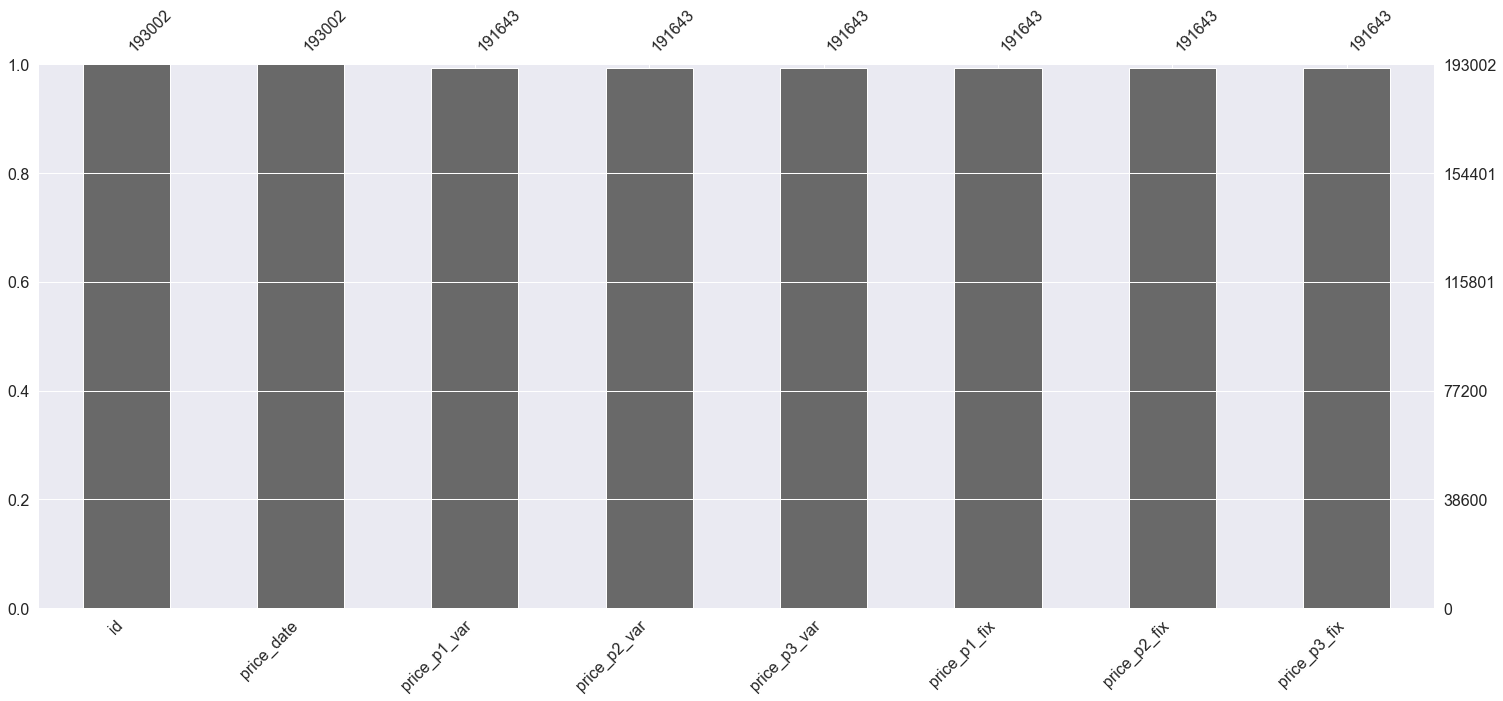

In [22]:
msno.bar(pco_history)

---
We have a similar pattern of data missing, missing % os 0.7%


<AxesSubplot:>

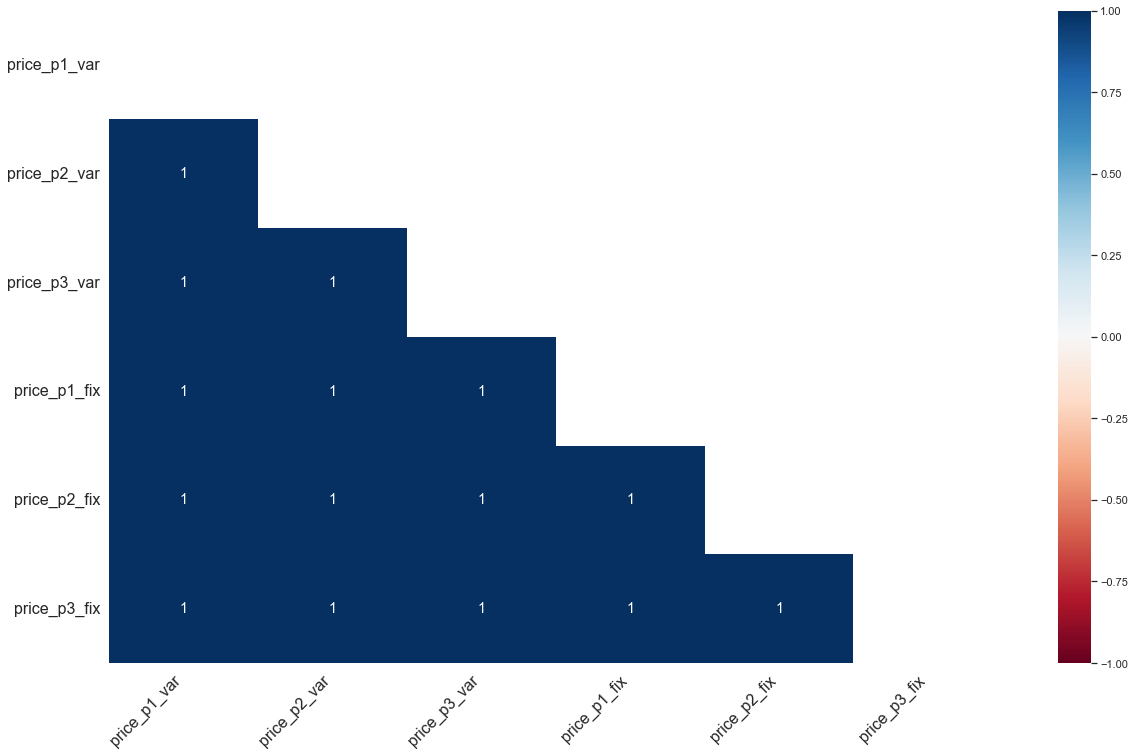

In [23]:
# Visualize the correlation between the numeric variables of the dataframe
msno.heatmap(pco_history)

In [24]:
# to visualize the missing data in the dataframe
# Getting the ID's containing the null values
hist_nan_index = pco_history[pco_history.isnull().any(axis=1)].index.values.tolist()

# displaying the dates
pco_history.iloc[hist_nan_index]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
pco_history.iloc[hist_nan_index].sort_values(by=['price_date'])['price_date'].unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
      dtype=object)

---
#### Need to learn the type of missingness
1. Missing complete by random (MCAR) <br>
Missing values has no relationship with any other values <br>
2. Missing at random (MAR) <br>
We observed the systematic relationship between missingness and other data values <br>
3. Missing not t random (MNAR) <br>
There is some relationship between missingness and its values
<br><br>
#### Information Observed 
* High correlation is observed between missingness and the other numeric columns. <br>
* After performing the sorting by id we observed linear date trends. <br>
* There are 1359 clients who are missing price data at least in 1 month
---

### Performing the forward fill

In [26]:
# filling Na values
pco_history.fillna(method='ffill' , inplace=True)
pco_history.iloc[hist_nan_index,3:9]

,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,0.000000,0.000000,44.266931,0.000000,0.000000
221,0.000000,0.000000,44.266931,0.000000,0.000000
377,0.087970,0.000000,44.266931,0.000000,0.000000
413,0.102239,0.070381,40.565969,24.339581,16.226389
461,0.000000,0.000000,44.266931,0.000000,0.000000
...,...,...,...,...,...
192767,0.105428,0.073487,40.565969,24.339581,16.226389
192788,0.000000,0.000000,44.444710,0.000000,0.000000
192875,0.093327,0.065635,58.936774,36.344726,8.334260
192876,0.093327,0.065635,58.936774,36.344726,8.334260


In [27]:
pco_history.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141006,0.054376,0.030689,43.326213,10.689406,6.450494
std,0.025091,0.050040,0.036333,5.431161,12.853850,7.781323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085450,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Energy consumer dataset

<AxesSubplot:>

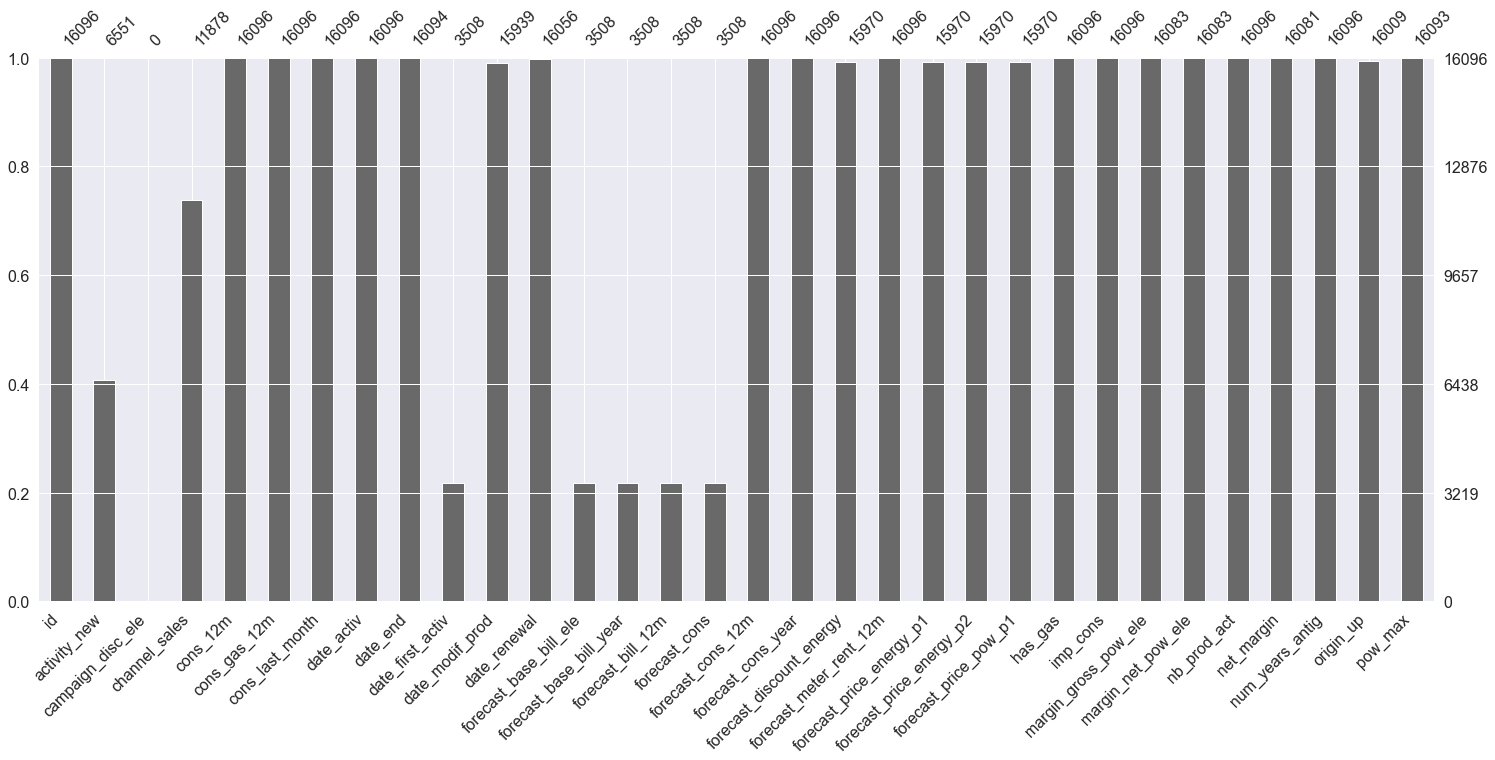

In [28]:
# visualising the null count of each columns
msno.bar(pco_energyDataset)

<AxesSubplot:>

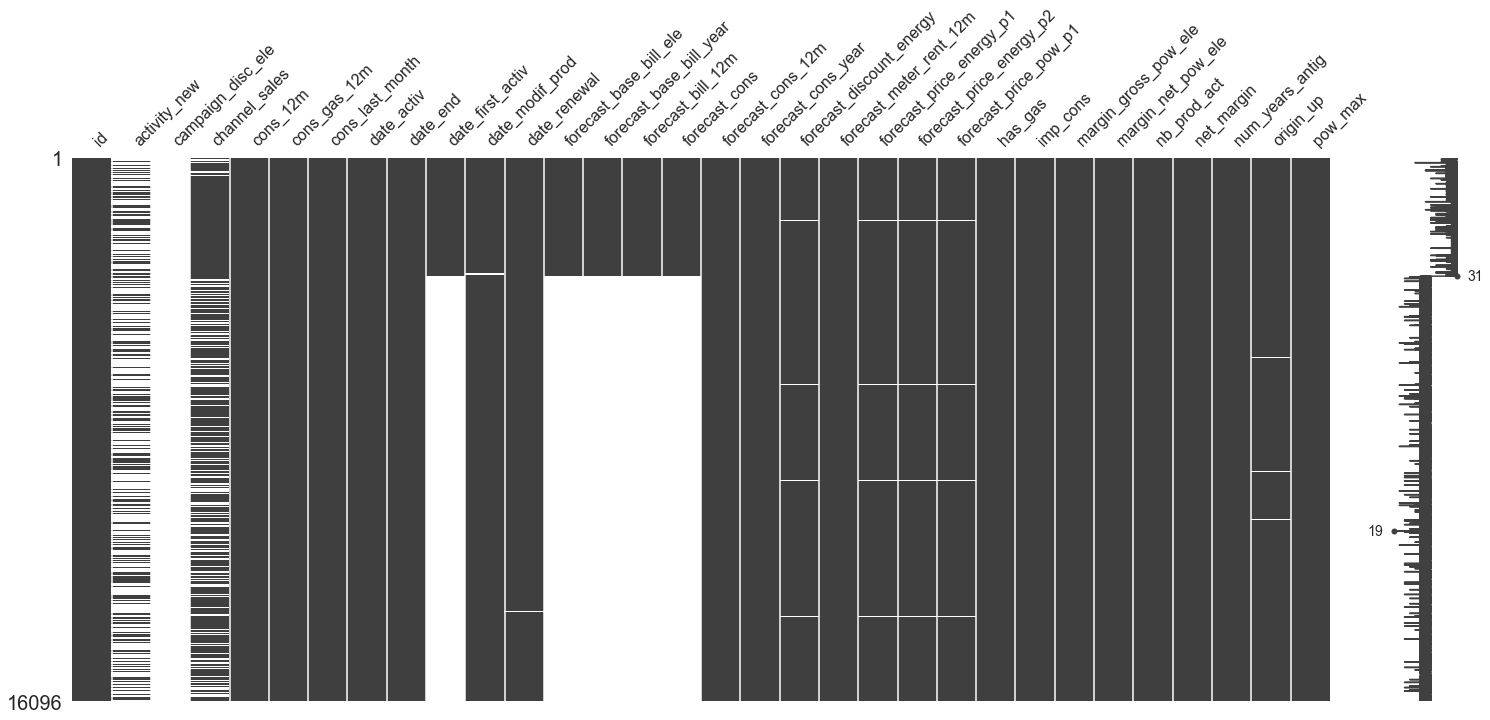

In [29]:
msno.matrix(pco_energyDataset.sort_values('date_first_activ'))

<AxesSubplot:>

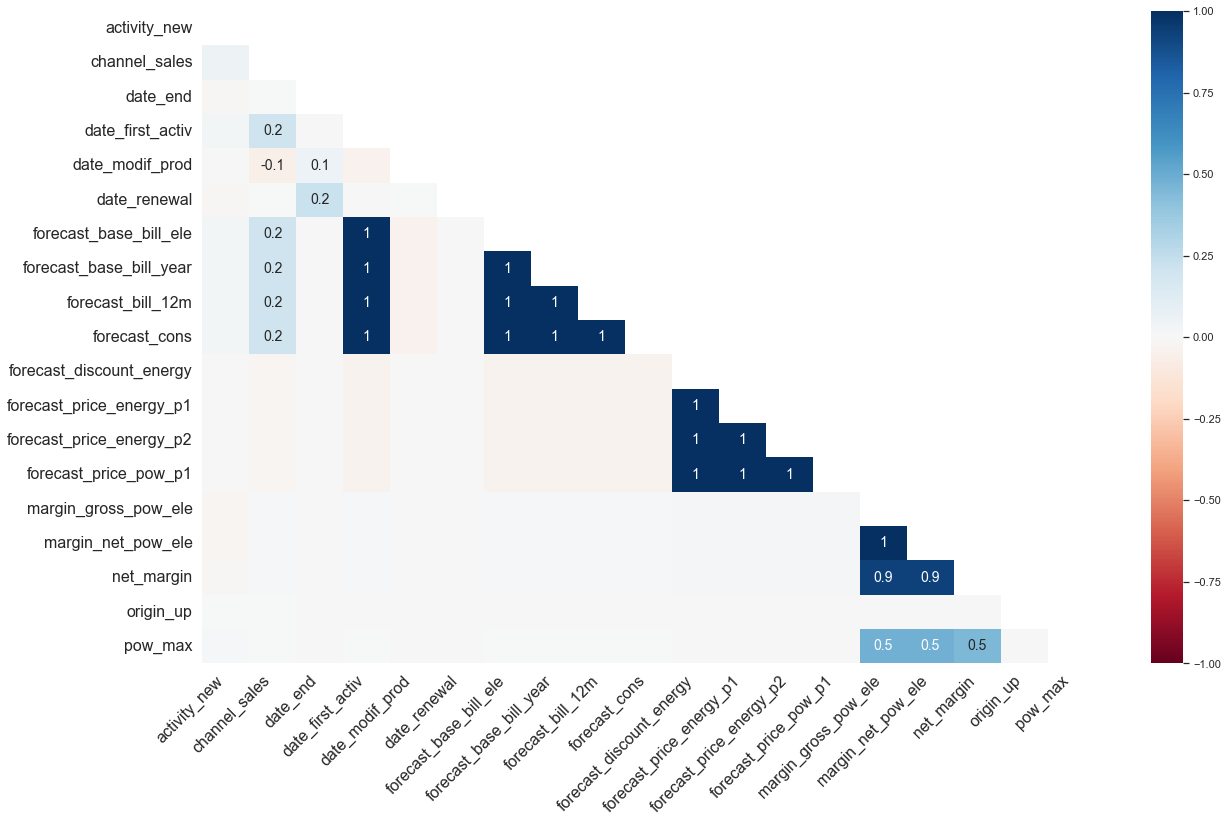

In [30]:
msno.heatmap(pco_energyDataset)

In [31]:
pco_energyDataset

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


<AxesSubplot:>

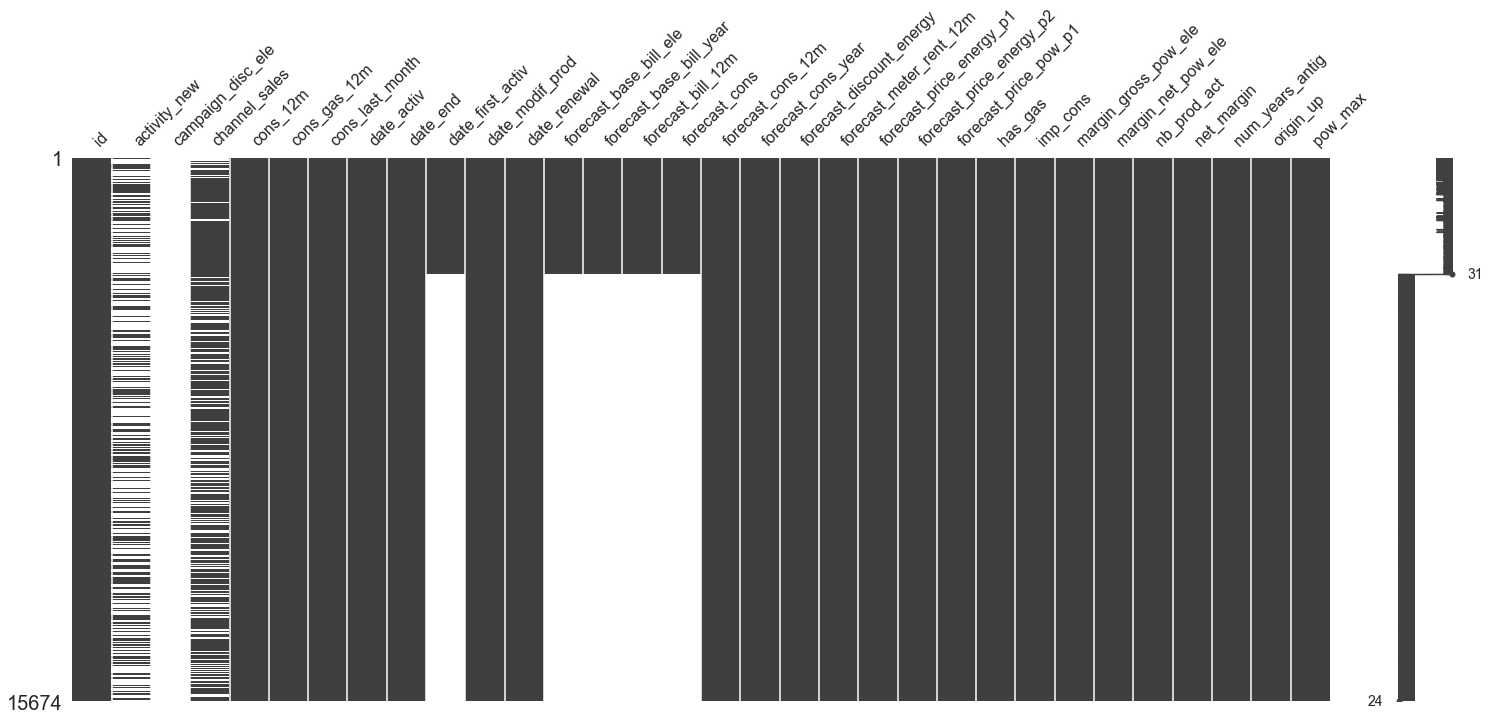

In [32]:
# deleteing the subset of missing values in dataset

brush = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
         'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1']
pco_energyDataset.dropna(subset= brush , how='any' , inplace=True)

msno.matrix(pco_energyDataset.sort_values('date_first_activ'))



In [33]:
# need to check whether date_Activ and date_frist_activ are similar or not

pro_activity = pco_energyDataset[['date_activ','date_first_activ']]

pro_activity.dropna(subset=['date_first_activ'] , how='any',inplace=True)

pro_activity.describe(datetime_is_numeric=True)


<ipython-input-33-4a48cdc08b51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_activity.dropna(subset=['date_first_activ'] , how='any',inplace=True)


,date_activ,date_first_activ
count,3368,3368
unique,1083,1114
top,2012-02-01,2009-07-14
freq,30,34


Both columns are different

In [34]:
# drop the unwanted columns
unwanted_columns = ['activity_new','campaign_disc_ele' ,
                    'date_first_activ','forecast_base_bill_ele'    ,  
'forecast_base_bill_year' ,'forecast_bill_12m', 'forecast_cons']
pco_energyDataset.drop(
                        labels= unwanted_columns , 
                        axis=1 ,
                        inplace = True)


In [35]:
# convert negative data into positive

numeric = [cols for cols in pco_energyDataset.columns
          if pco_energyDataset[cols].dtype == 'float64'
          or pco_energyDataset[cols].dtype == 'int64']

pco_energyDataset[numeric] = pco_energyDataset[numeric].apply(abs)
pco_energyDataset

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,58.995952,f,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
5,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,...,40.606701,f,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [36]:
# merge the final dataset with the pco_output

pco_energyDataset = pco_energyDataset.merge(right=pco_output , on=['id'])
pco_energyDataset.head(7)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,...,f,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,0
5,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
6,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1


In [37]:
pco_output.shape

(16096, 2)

---
### Important Observation
* campaign_disc_ele is complete empty
* The variable `activity_new` is MCAR and has very low correlation with any of the variables. We can safely drop this column.
* date_first_act, forcast_base_bill_ele, forcast_base_bill_year, forcast_bill_12m and forcast_cons and missing value similar trends
---

# Data Visualisation

### Visualisation functions

In [38]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
        
def plot_distribution(dataframe , column , ax , bins_ = 50):
    
    """
    Display histogram with respect to churn and retention
    """
    # creating the dataframe
    data = pd.DataFrame({"Retention": dataframe[dataframe['churn'] == 0][column],
                        "Churn": dataframe[dataframe['churn'] == 1][column]})

     # Plot the histogram
    data.plot(kind='hist', bins=bins_, ax=ax , stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
    
def plot_normal_distribution(pco_energyDataset , column):

    # applying the log transformation to make the distribution a normal
    new_col = "log_" + column
    pco_energyDataset[new_col] = pco_energyDataset[column].apply(lambda x:np.log(1+x))
    sns.displot(pco_energyDataset[new_col])
    
def plot_boxplot(consumption , column):
    
    # Plot histogram
    sns.boxplot(consumption[column])


    plt.show()
    # Remove scientific notation
    for ax in axs:
        ax.ticklabel_format(style='plain', axis='x')
        # Set x-axis limit
        axs[0].set_xlim(-200000, 2000000)
        axs[1].set_xlim(-200000, 2000000)
        axs[2].set_xlim(-20000, 100000)
        plt.show()

#I will use IQR method to detect outliers
def remove_outliers(df,col):
    
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    upper_bound=q3+(iqr*1.5)
    lower_bound=q1-(iqr*1.5)
    df=df[(lower_bound<df[col])|(df[col]<upper_bound)]

### Customer's power purchased data

In [39]:
total_churn = pco_output.groupby(pco_output['churn']).count()
churn_percentage = total_churn * 100 / total_churn.sum()

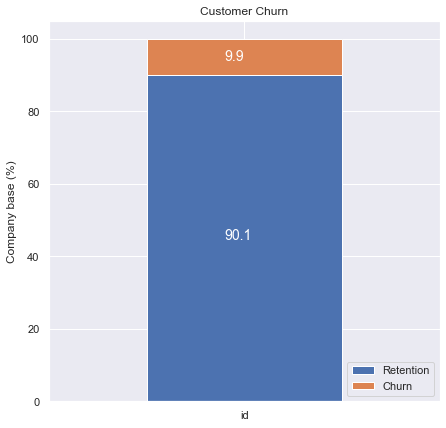

In [40]:
plot_stacked_bars(churn_percentage.transpose(), "Customer Churn", (7, 7), legend_="lower right")

---
* 90% is retention of customers
* 9.9% is churn %
Churn rate is very low

In [41]:
channel = pco_energyDataset[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [1]:
# Note that columns is of y-axis and rows are your x-axis

plot_stacked_bars(channel_churn, 'Sales channel', rot_=30) # rot is rotation of x-axis

NameError: name 'plot_stacked_bars' is not defined

---
First channel has greater churn than other channels

In [43]:
consumption = pco_energyDataset[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

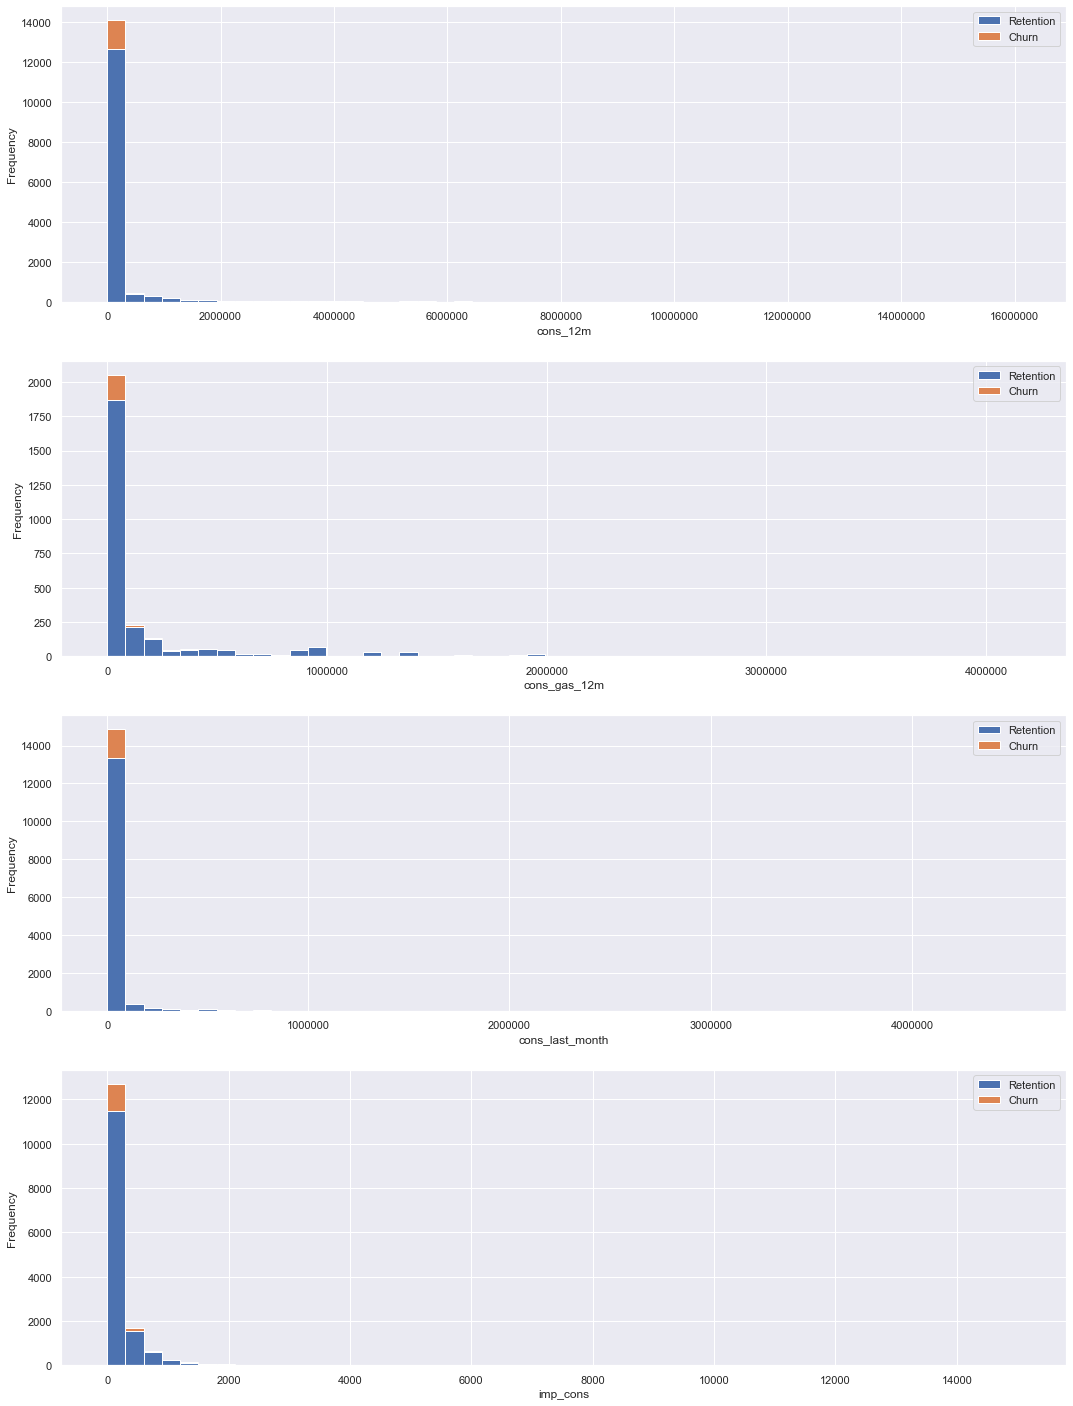

In [44]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

---
Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers.

In [45]:
dates = pco_energyDataset[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]]

In [46]:
# Transform date columns to datetime type

dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d') 
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d') 
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')


<ipython-input-46-8e2bb4df7bc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
<ipython-input-46-8e2bb4df7bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
<ipython-input-46-8e2bb4df7bc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [47]:
def plot_dates(dataframe, column, fontsize_=12): 
    
    """
        Plot monthly churn and retention distribution 
    """
    # Group by month
    temp = dataframe[[column,"churn","id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right") 
    plt.show()

def line_format(label): 
    """
    Convert time label to the format of pandas line plot 
    """
    month = label.month_name()[:1]
    if label.month_name() == "January": 
        month += f'\n{label.year}'
    return month


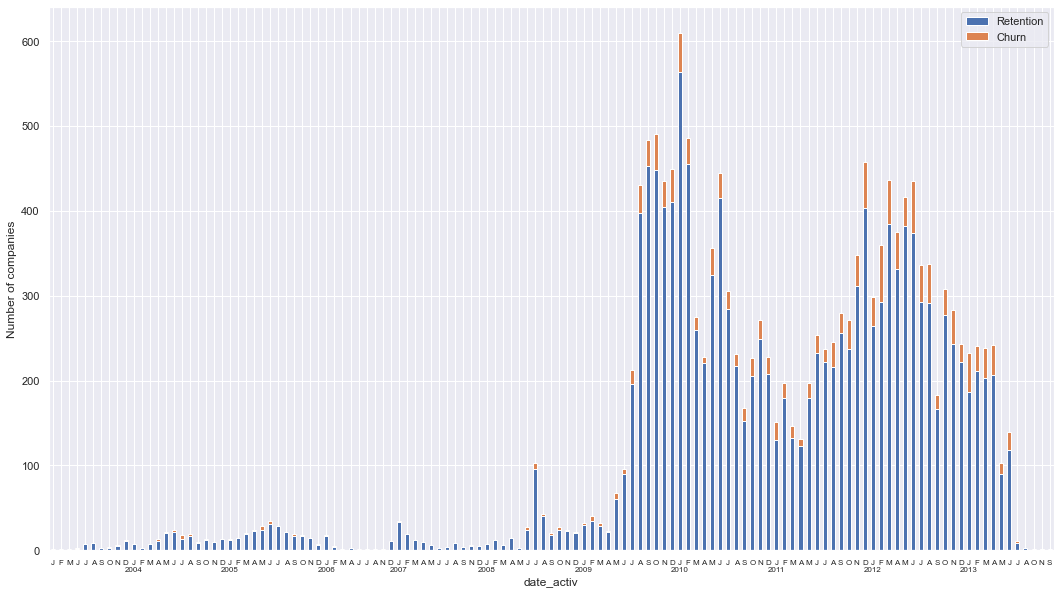

In [48]:
plot_dates(dates, "date_activ", fontsize_=8)

It can be seen that churn started to increase after 2010

---

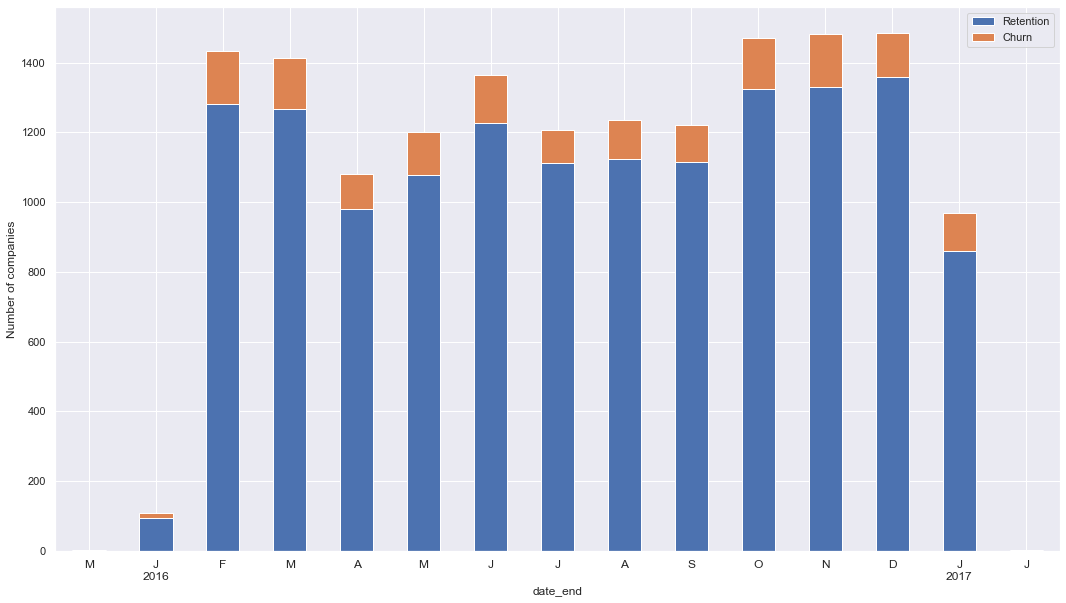

In [49]:
plot_dates(dates, "date_end")

There are almost equal percentage of churn in the end date of contract

---

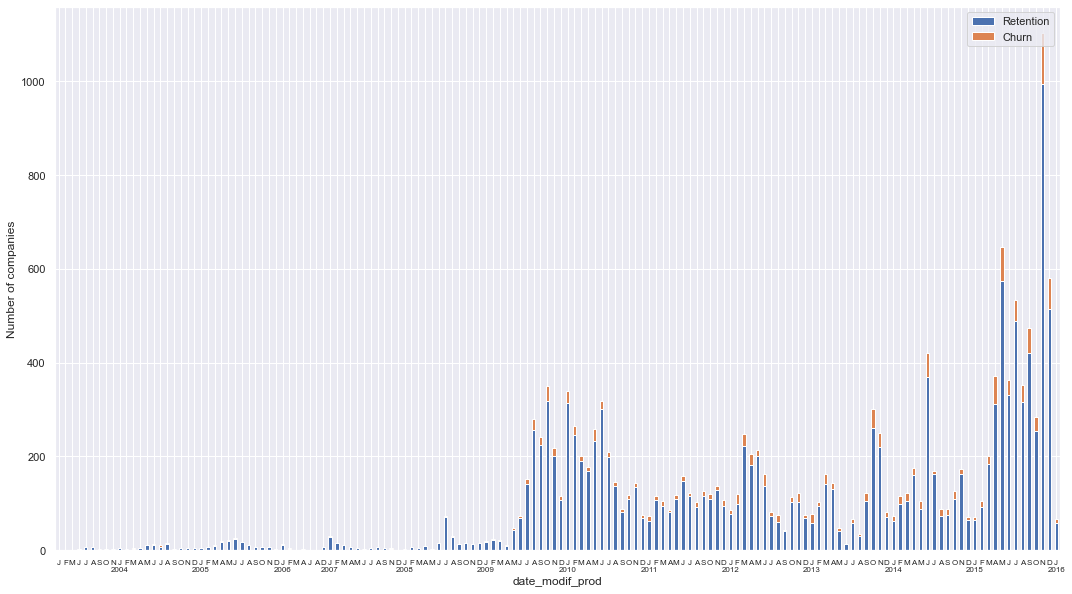

In [50]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

Noticed the greater number of churn on the 2015 year

---

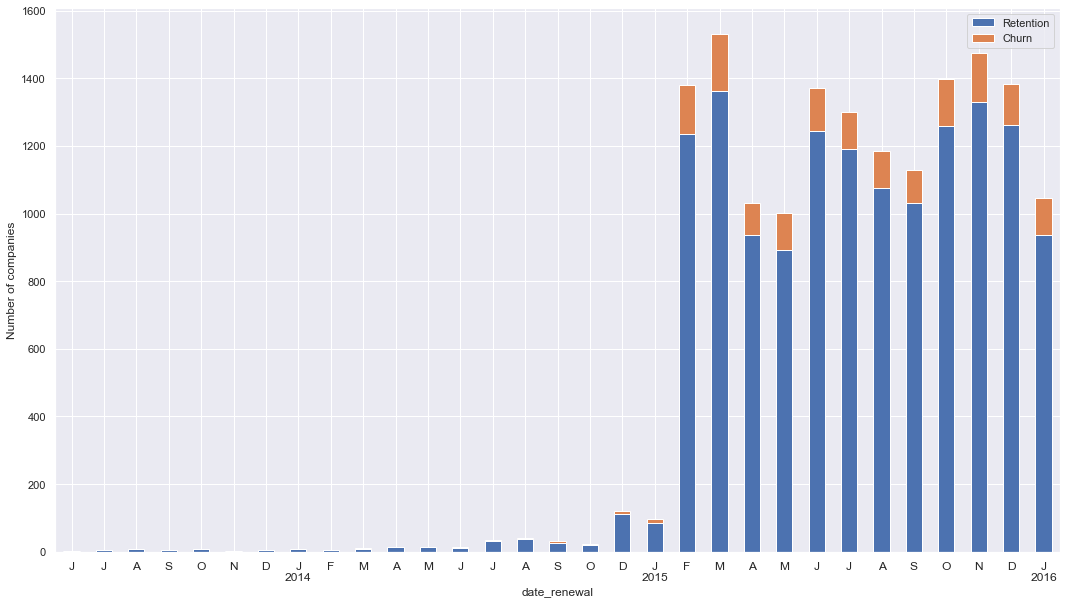

In [51]:
plot_dates(dates, "date_renewal")

Noticed the higher number of churn rate in the date of renewal

---

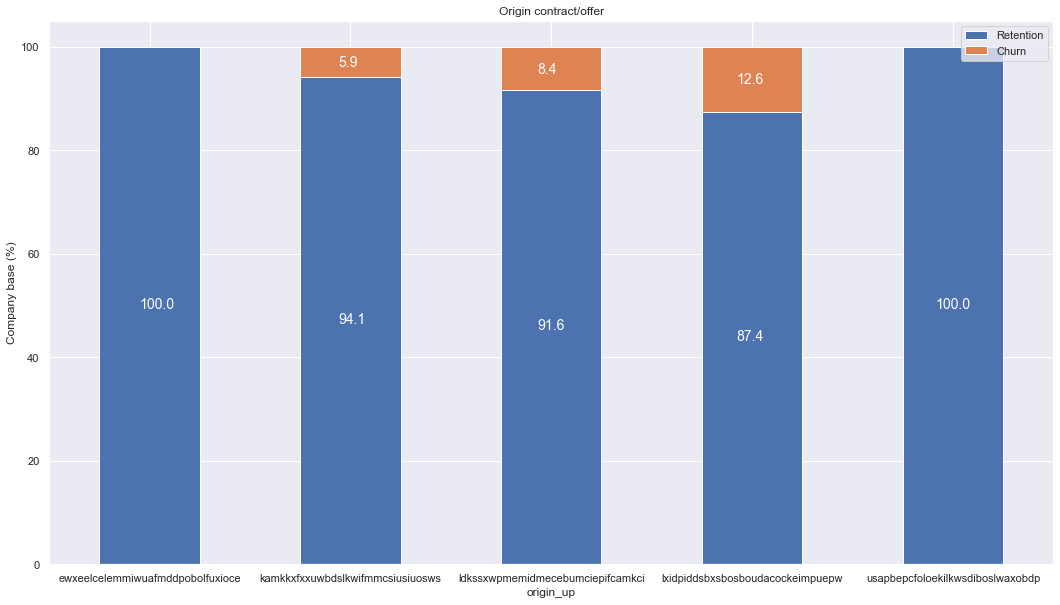

In [52]:
others = pco_energyDataset[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1) 
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")


Greater number of customer churn at campaign 4

---

<AxesSubplot:>

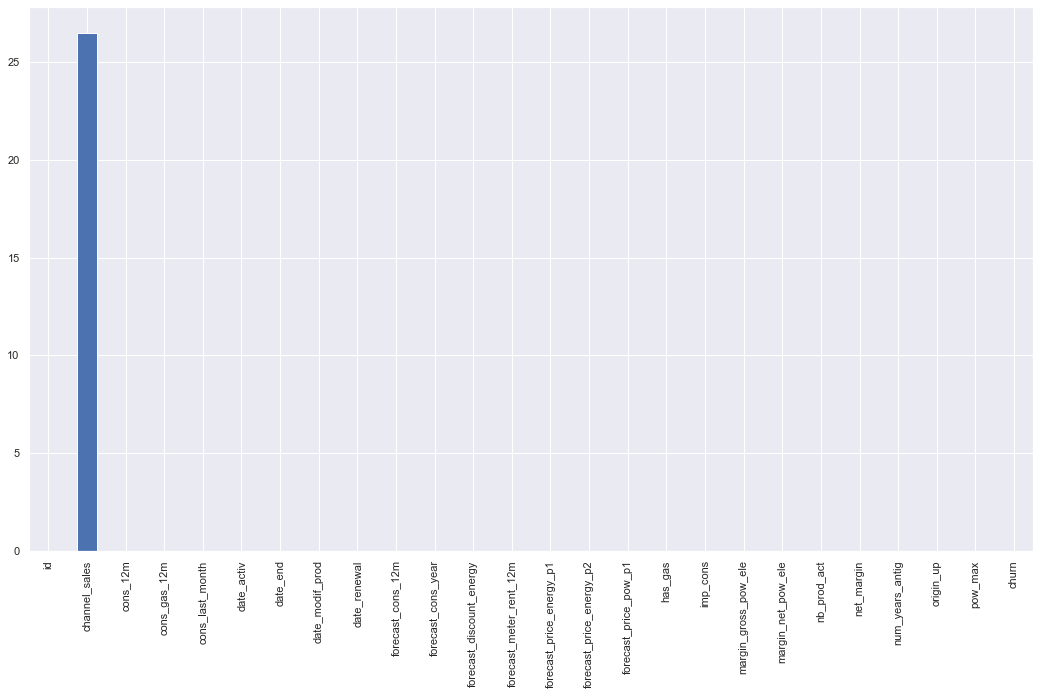

In [53]:
(pco_energyDataset.isnull().sum()/len(pco_energyDataset.index)*100).plot(kind="bar", figsize=(18,10))

### Forcasting data

In [54]:
forecast = pco_energyDataset[
    ["id", 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1',"churn"
    ]
]


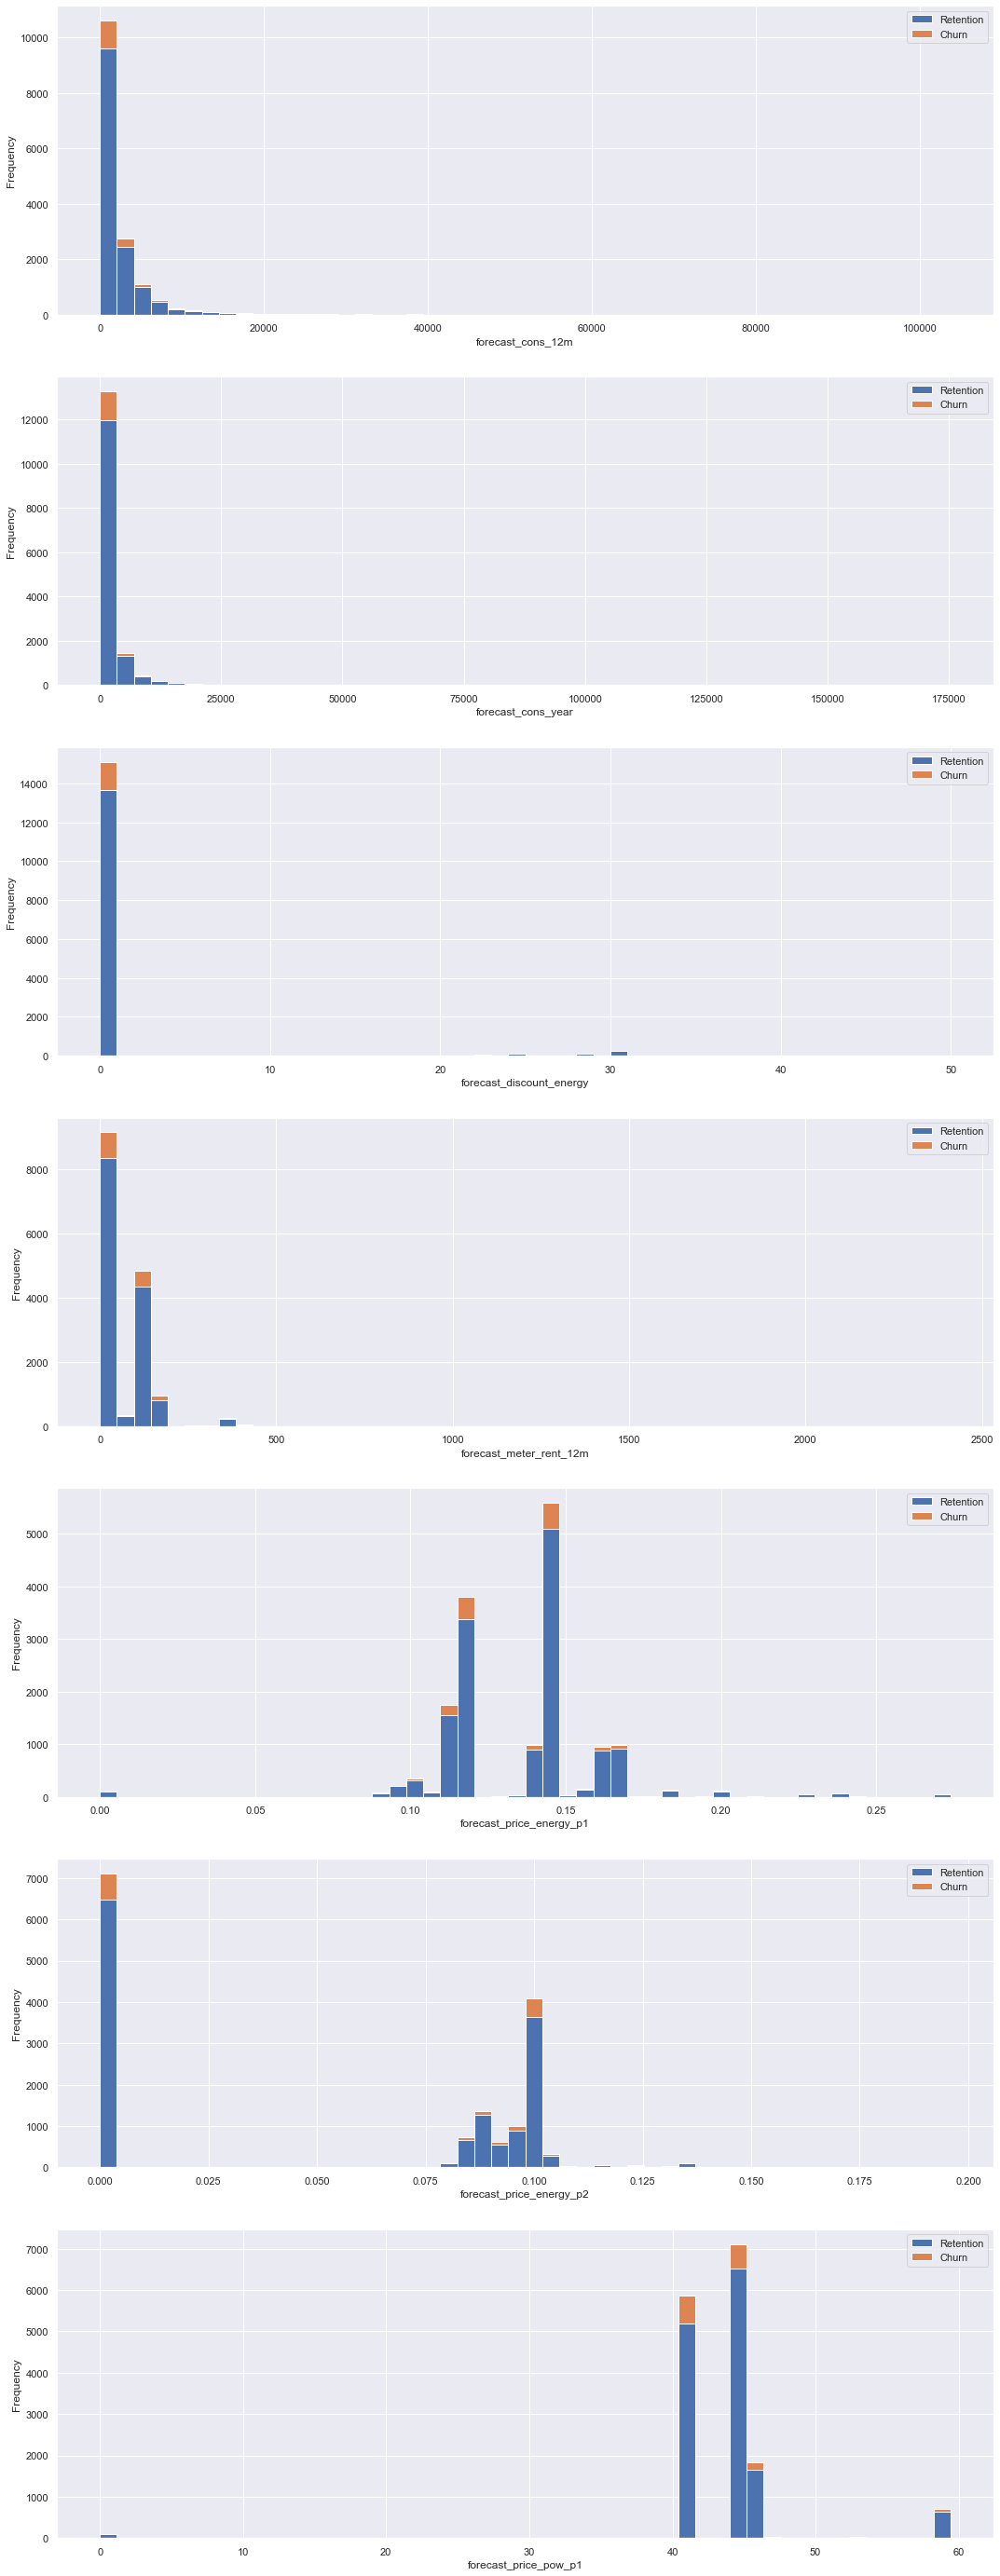

In [55]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(pco_energyDataset, "forecast_cons_12m", axs[0])
plot_distribution(pco_energyDataset, "forecast_cons_year", axs[1])
plot_distribution(pco_energyDataset, "forecast_discount_energy", axs[2])
plot_distribution(pco_energyDataset, "forecast_meter_rent_12m", axs[3])
plot_distribution(pco_energyDataset, "forecast_price_energy_p1", axs[4])
plot_distribution(pco_energyDataset, "forecast_price_energy_p2", axs[5])
plot_distribution(pco_energyDataset, "forecast_price_pow_p1", axs[6])

---
we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values

### checking the gas consumer customer

In [56]:
contract_type = pco_energyDataset[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

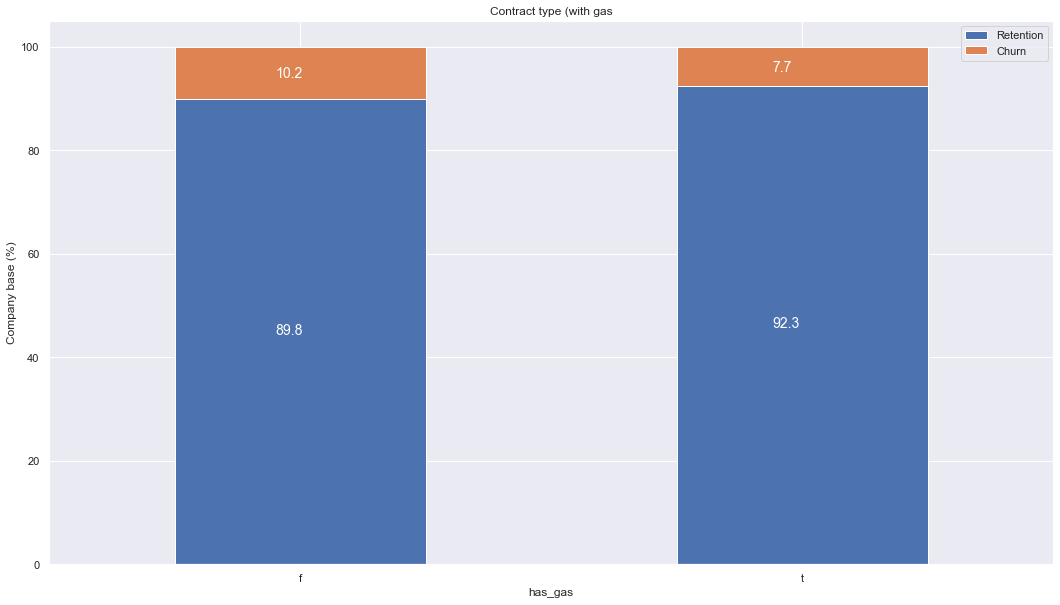

In [57]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

### Subscribed Power

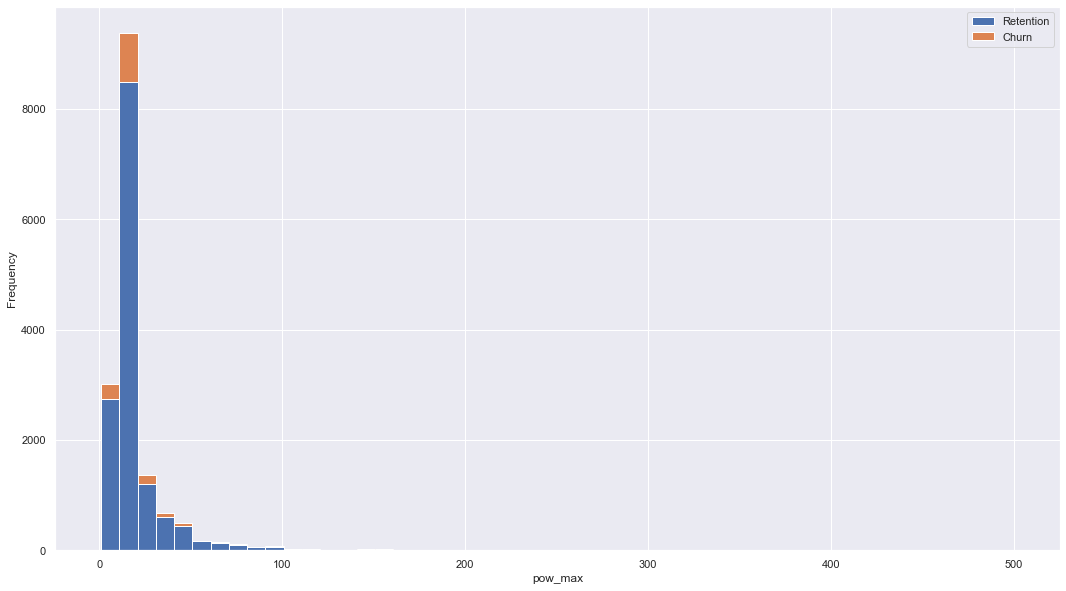

In [58]:
power = pco_energyDataset[['id', 'pow_max', 'churn']]
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Others Purchased Item of Customer

In [59]:
others = pco_energyDataset[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

In [60]:
others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)

churn,0,1
nb_prod_act,,
1,11005.0,1239.0
2,2415.0,211.0
3,492.0,54.0
4,151.0,13.0
5,31.0,3.0
6,9.0,NaN
8,8.0,NaN
9,12.0,NaN
10,2.0,NaN


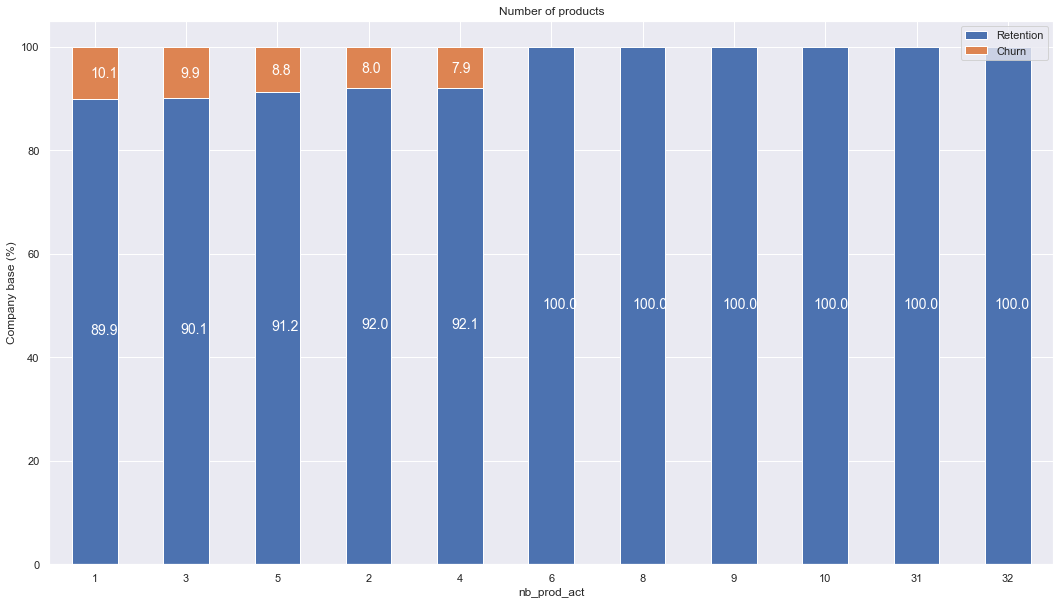

In [61]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False) 
plot_stacked_bars(products_percentage, "Number of products")


The first 5 have greater number of churn

---

# Feature Engineering
Now that we have explored the data, it's time to investigate whether price sensitivity has some influence on churn. First we need to define exactly what is price sensitivity.

    > Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months

In [62]:
pco_history.columns

Index(['id', 'price_date', 'price_p1_var', 'price_p2_var', 'price_p3_var',
       'price_p1_fix', 'price_p2_fix', 'price_p3_fix'],
      dtype='object')

In [63]:
# Transform date columns to datetime type
pco_energyDataset["date_activ"] = pd.to_datetime(pco_energyDataset["date_activ"], format='%Y-%m-%d')
pco_energyDataset["date_end"] = pd.to_datetime(pco_energyDataset["date_end"], format='%Y-%m-%d')
pco_energyDataset["date_modif_prod"] = pd.to_datetime(pco_energyDataset["date_modif_prod"], format='%Y-%m-%d')
pco_energyDataset["date_renewal"] = pd.to_datetime(pco_energyDataset["date_renewal"], format='%Y-%m-%d')
pco_history['price_date'] = pd.to_datetime(pco_history['price_date'], format='%Y-%m-%d')

# Create mean average data
mean_year = pco_history.groupby(['id']).mean().reset_index()
mean_6m = pco_history[pco_history['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = pco_history[pco_history['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

# Comnbine into single dataframe
mean_year = mean_year.rename(
    index=str, 
    columns={
        "price_p1_var": "mean_year_price_p1_var",
        "price_p2_var": "mean_year_price_p2_var",
        "price_p3_var": "mean_year_price_p3_var",
        "price_p1_fix": "mean_year_price_p1_fix",
        "price_p2_fix": "mean_year_price_p2_fix",
        "price_p3_fix": "mean_year_price_p3_fix"
    }
)

mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

mean_6m = mean_6m.rename(
    index=str, 
    columns={
        "price_p1_var": "mean_6m_price_p1_var",
        "price_p2_var": "mean_6m_price_p2_var",
        "price_p3_var": "mean_6m_price_p3_var",
        "price_p1_fix": "mean_6m_price_p1_fix",
        "price_p2_fix": "mean_6m_price_p2_fix",
        "price_p3_fix": "mean_6m_price_p3_fix"
    }
)
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

mean_3m = mean_3m.rename(
    index=str, 
    columns={
        "price_p1_var": "mean_3m_price_p1_var",
        "price_p2_var": "mean_3m_price_p2_var",
        "price_p3_var": "mean_3m_price_p3_var",
        "price_p1_fix": "mean_3m_price_p1_fix",
        "price_p2_fix": "mean_3m_price_p2_fix",
        "price_p3_fix": "mean_3m_price_p3_fix"
    }
)
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')
pco_energyDataset = pco_energyDataset.merge(right=price_features , on=['id'])

# Dealing with outliers

In [64]:
pco_energyDataset.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
count,1.567300e+04,1.567300e+04,1.567300e+04,15673.000000,15673.000000,15673.000000,15673.000000,15673.000000,15673.000000,15673.000000,...,15673.000000,15673.000000,15673.000000,15673.000000,15673.000000,15673.000000,15673.000000,15673.000000,15673.000000,15673.000000
mean,1.916257e+05,3.132300e+04,1.941712e+04,2359.729893,1911.820328,0.975882,70.214753,0.135923,0.052856,43.522244,...,6.476602,0.137947,0.053510,0.030861,43.445682,10.673747,6.454542,43.583629,10.727257,6.485403
std,6.724888e+05,1.716345e+05,8.227129e+04,3979.727024,5224.957904,5.124166,78.561529,0.026282,0.048639,5.221813,...,7.815237,0.026155,0.049283,0.036619,5.442938,12.856017,7.799604,5.453985,12.895117,7.835524
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.893000e+03,0.000000e+00,0.000000e+00,514.040000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,...,0.000000,0.118746,0.000000,0.000000,40.728885,0.000000,0.000000,40.847819,0.000000,0.000000
50%,1.522500e+04,0.000000e+00,9.090000e+02,1178.960000,382.000000,0.000000,19.430000,0.142881,0.086163,44.311378,...,0.000000,0.144524,0.086087,0.000000,44.355820,0.000000,0.000000,44.505904,0.086149,0.000000
75%,4.954300e+04,0.000000e+00,4.132000e+03,2677.230000,1995.000000,0.000000,131.500000,0.146348,0.098837,44.311378,...,16.345105,0.147773,0.100491,0.073625,44.444710,24.437330,16.291555,44.592483,24.537821,16.364214
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,...,17.006283,0.276238,0.196029,0.103502,59.444710,36.490689,17.291555,59.720948,36.620532,17.382386


c:\users\masab\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\masab\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\masab\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

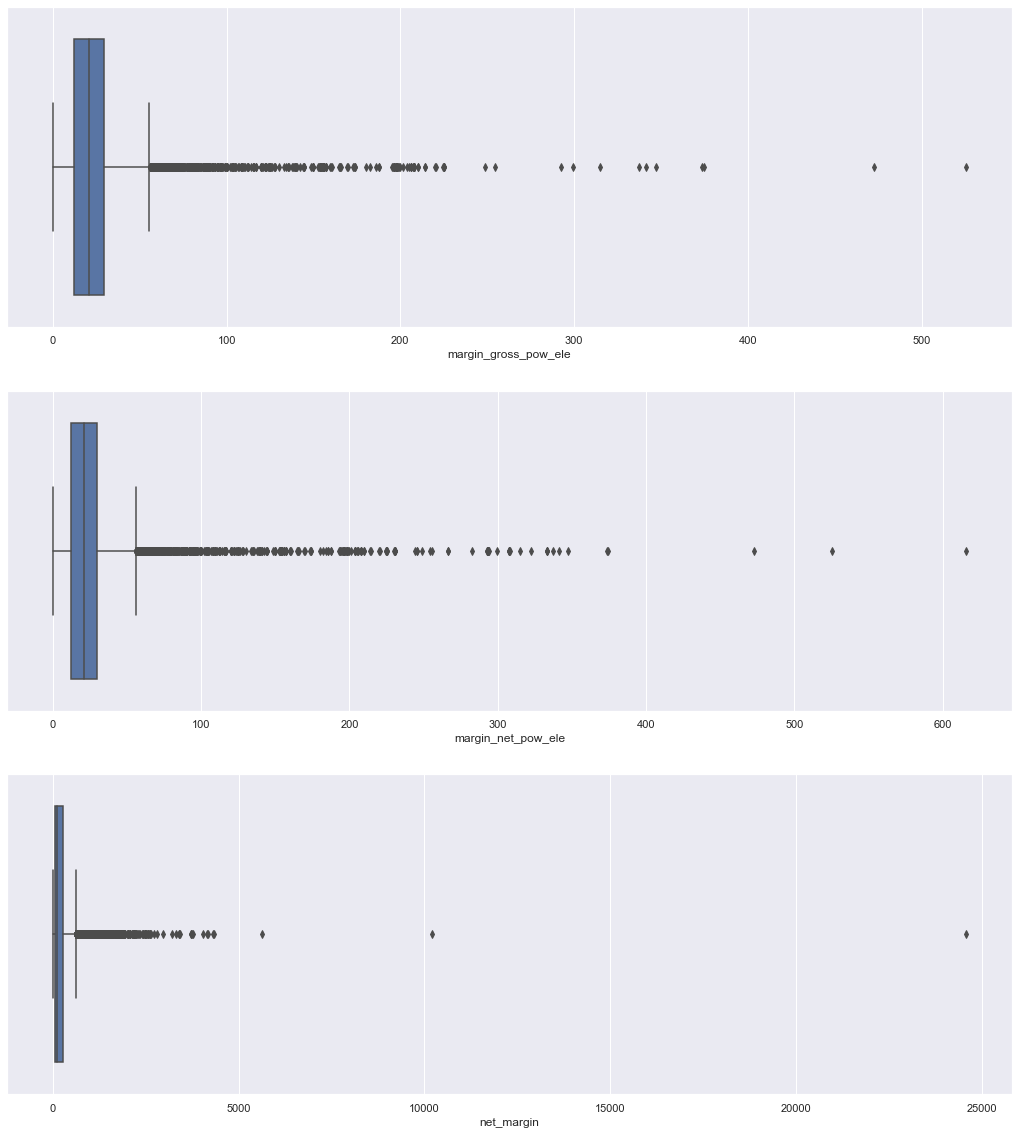

In [65]:
"""
    Displaying some features having outliers
"""

fig, axs = plt.subplots(nrows=3, figsize=(18,20))
margin = pco_energyDataset[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
# Plot histogram
sns.boxplot(pco_energyDataset["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(pco_energyDataset["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(pco_energyDataset["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

### Removing outliers
removing outliers with statistical method.

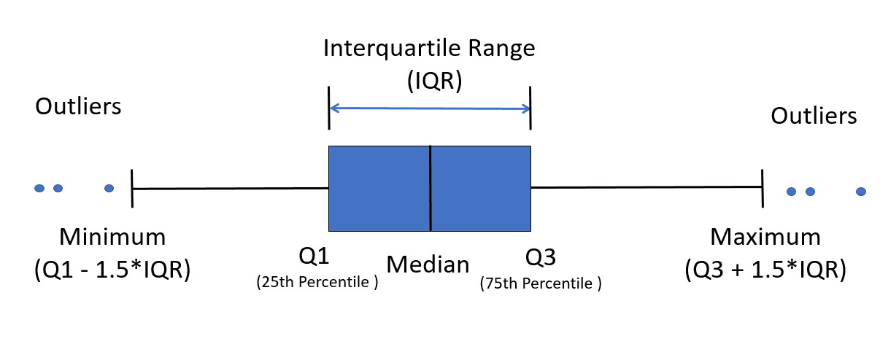

In [66]:
from IPython.display import Image
Image(filename='ss.png') 

In [67]:
# removing outliers of each features
removed_cols = pco_energyDataset.drop(columns=['id' ,'channel_sales' , 'has_gas' , 'origin_up'] , axis=1)
for col in removed_cols.columns:
    remove_outliers(removed_cols , col)
print("removed outliers")

removed outliers


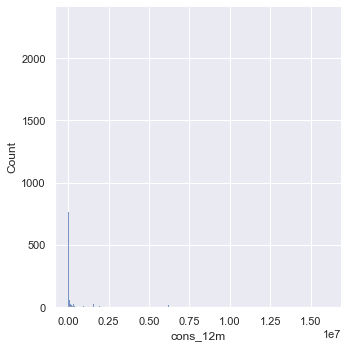

In [68]:
# the distribution is not normal
sns.displot(pco_energyDataset['cons_12m'])

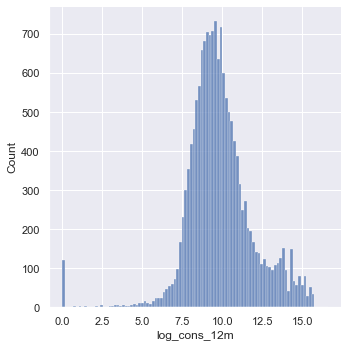

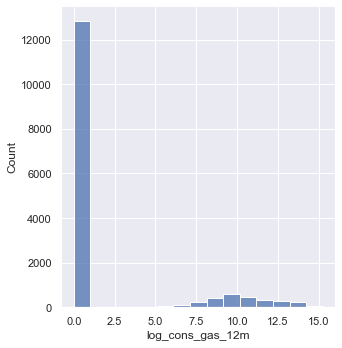

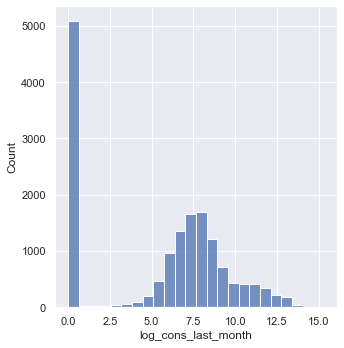

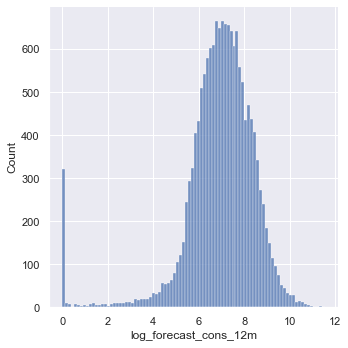

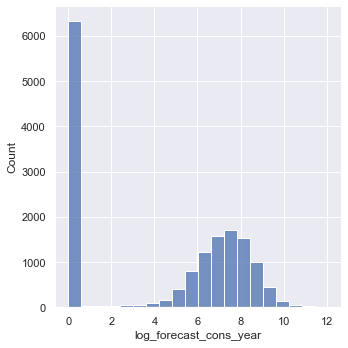

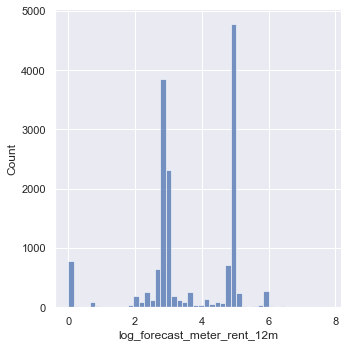

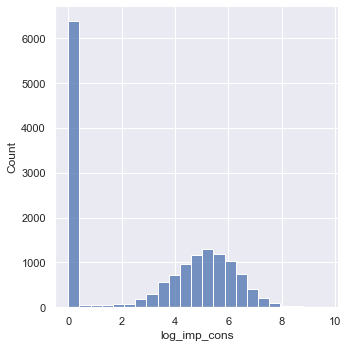

In [69]:
# creating a normal distribution and plot the histogram
columns = ['cons_12m' , 'cons_gas_12m' , 'cons_last_month',
          'forecast_cons_12m', 'forecast_cons_year',
          'forecast_meter_rent_12m' , 'imp_cons']

for col in columns:
    plot_normal_distribution(pco_energyDataset , col)
    
# drop the columns from final dataframe
pco_energyDataset = pco_energyDataset.drop(columns,axis=1)

---
From the previous EDA we can see that some features are highly skewed, we need to transform the distribution to normal-like distribution

# Finding correlation

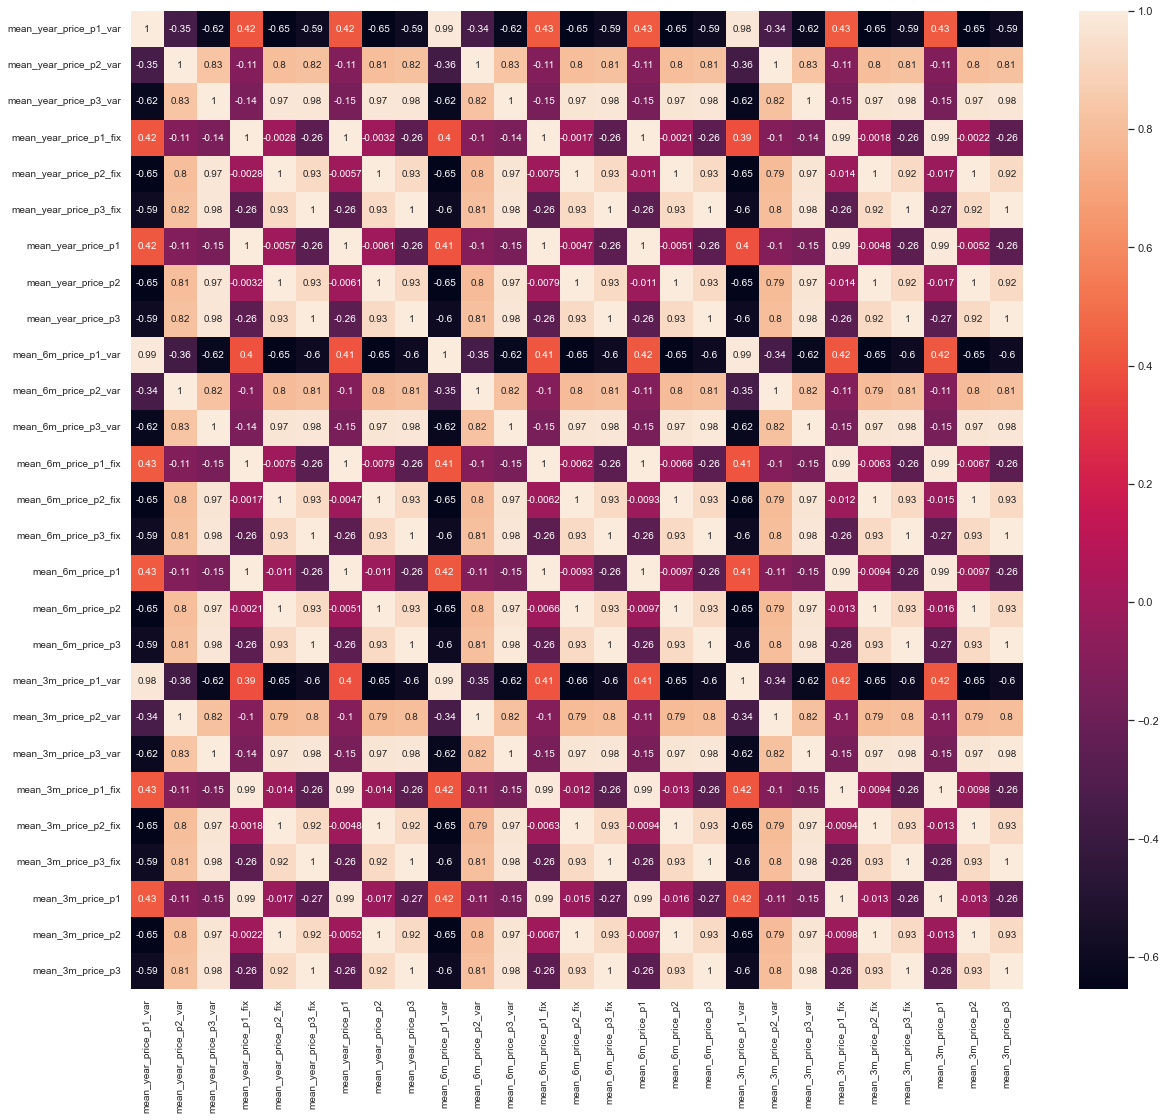

In [70]:
corr = price_features.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

---
From the correlation plot, it shows a higher magnitude of correlation between other price sensitivity variables, however overall the correlation with churn is very low. This indicates that there is a weak linear relationship between price sensitity and churn. This suggests that for price sensivity to be a major driver for predicting churn, we may need to engineer the feature differently.

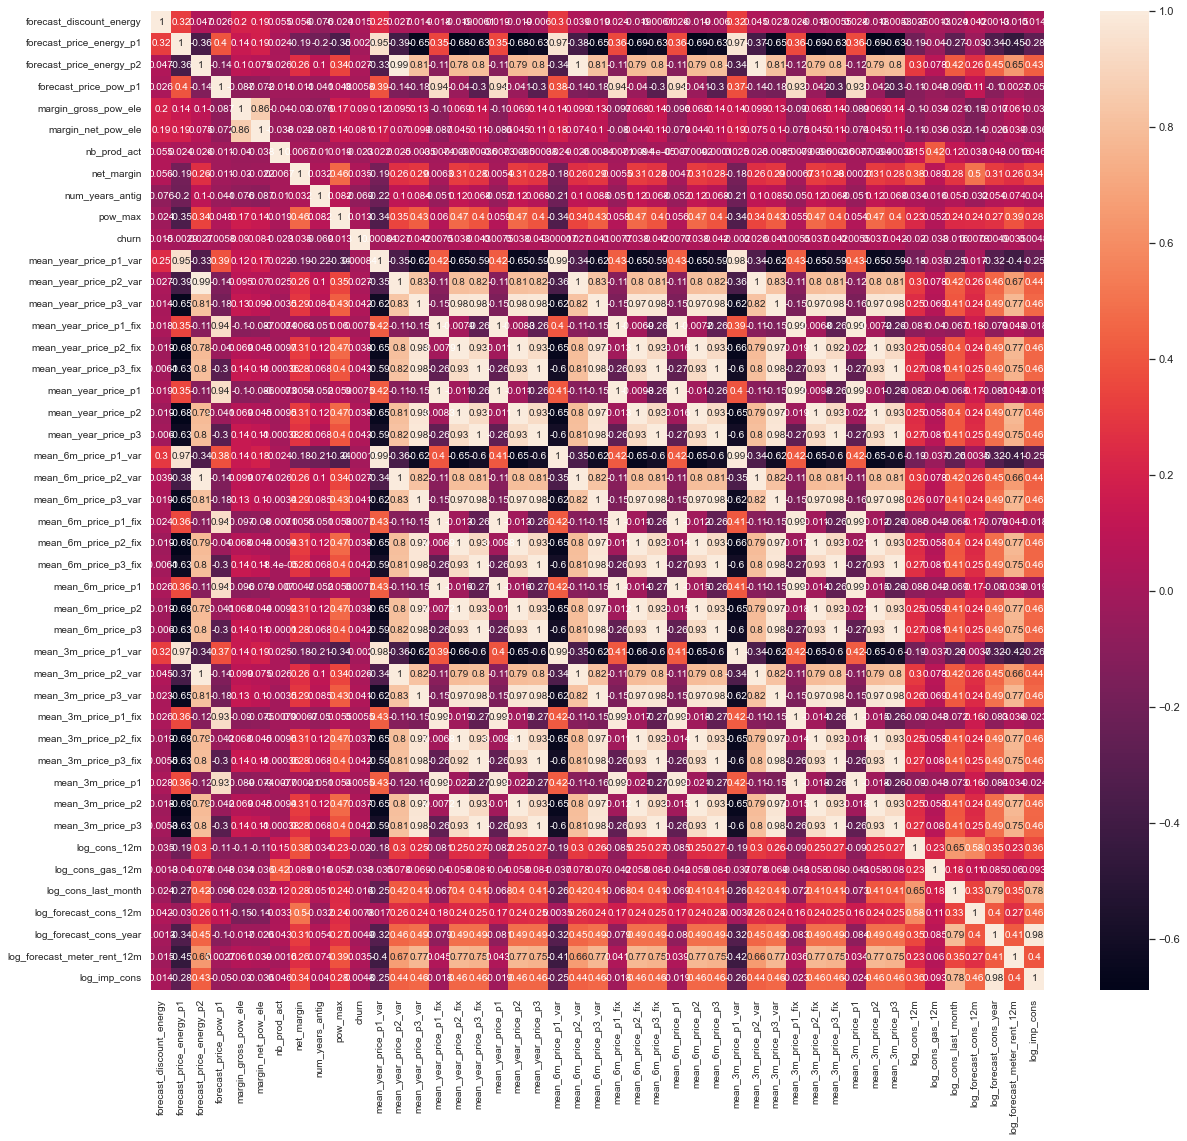

In [71]:
corr = pco_energyDataset.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

---
we can find the correlation between `forcast_price_pow_p1` and `imp_cons`

In [72]:
import os

if not os.path.exists(os.path.join("processed_data")): 
    os.makedirs(os.path.join("processed_data"))
    

In [73]:
PICKLE_ENERGY_DIR = os.path.join("processed_data", "processed_EnergyData.pkl")
PICKLE_PRICE_DIR = os.path.join("processed_data", "processed_PriceData.pkl")

In [74]:
pd.to_pickle(pco_energyDataset, PICKLE_ENERGY_DIR)
pd.to_pickle(pco_history, PICKLE_PRICE_DIR)